In [1]:
import numpy as np
#matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Wed Sep  1 21:36:05 2021


In [4]:
# read a data file, store all data in arrays

file = "../../CSV/Beamline_Cycles-50s_W0028_H07-210805-191240-1.csv"


print (file)
time.ctime()

data=np.loadtxt(file, dtype= int, delimiter=",", usecols = (0,1,2,3))

x   = data[:, 0]
y   = data[:, 1]
toa   = data[:, 2]
tot   = data[:, 3]

toa = toa / 4096*25*1e-9

f_x = open("../../data/beamline/x.npz", "wb")
f_y = open("../../data/beamline/y.npz", "wb")
f_toa = open("../../data/beamline/toa.npz", "wb")
f_tot = open("../../data/beamline/tot.npz", "wb")
np.save(f_x, x)
np.save(f_y, y)
np.save(f_toa, toa)
np.save(f_tot, tot)




../../CSV/Beamline_Cycles-50s_W0028_H07-210805-191240-1.csv


In [3]:
# Load Data

f_x = open("../../data/beamline/x.npz", "rb")
f_y = open("../../data/beamline/y.npz", "rb")
f_toa = open("../../data/beamline/toa.npz", "rb")
f_tot = open("../../data/beamline/tot.npz", "rb")
x = np.load(f_x)
y = np.load(f_y)
toa = np.load(f_toa)
tot = np.load(f_tot)

In [4]:
for i in range(0,20):
    print (i, x[i],y[i],toa[i],tot[i])
    
print (len(toa), time.ctime())

0 176 144 0.9642003265625001 100
1 176 144 0.9767493390625 100
2 176 144 0.9805379078125 100
3 176 144 0.9815653781250001 150
4 176 144 0.9904485703125001 150
5 176 144 0.991690103125 125
6 176 144 0.9985161750000001 225
7 176 144 0.9992297109375 125
8 176 144 0.9997707015625 25
9 176 144 1.0004743656250001 25
10 176 144 1.0010446015625 25
11 176 144 1.001260953125 50
12 176 144 1.0038793953125 25
13 176 144 1.006182696875 375
14 176 144 1.0120723015625002 325
15 176 144 1.0140842984375 225
16 176 144 1.0166843046875 25
17 176 144 1.0175269421875002 225
18 176 144 1.0180900796875 425
19 176 144 1.0184307609375 250
29073337 Wed Sep  1 21:36:56 2021


In [5]:
print(len(toa))
print(max(toa))
print(min(toa))

29073337
50.910097068750005
0.9642003265625001


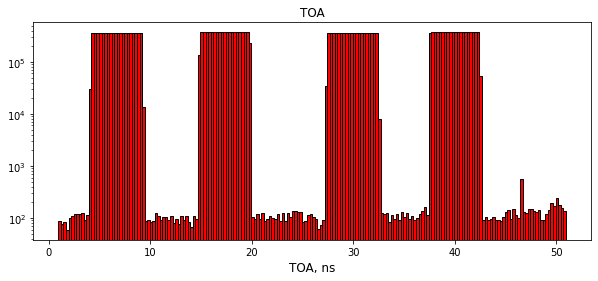

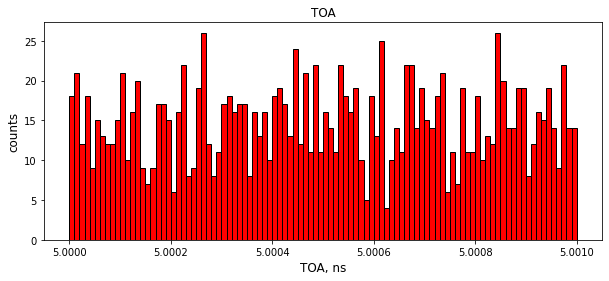

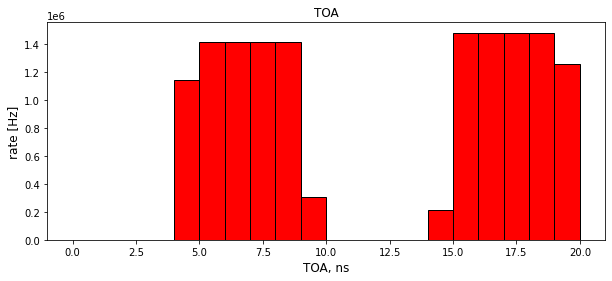

In [6]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(toa, bins = 200, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.yscale('log')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(toa, bins = 100, range = (5.0, 5.001), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(toa, bins = 20, range = (0., 2.0E+1), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('rate [Hz]',fontsize = 12)
plt.show()

In [7]:
xon1 =[]; yon1 = []; xoff1 = []; yoff1 = []


tminon1 = 4.1; tmaxon1 = 10.0; tminoff1 = 14.5; tmaxoff1 = 20.0

for i in range(len(toa)):
    if (tminon1 < toa[i] < tmaxon1): 
        xon1.append(x[i])
        yon1.append(y[i])
    if (tminoff1 < toa[i] < tmaxoff1): 
        xoff1.append(x[i])
        yoff1.append(y[i])
        
print(len(xon1), len(xoff1))

7120447 7397207


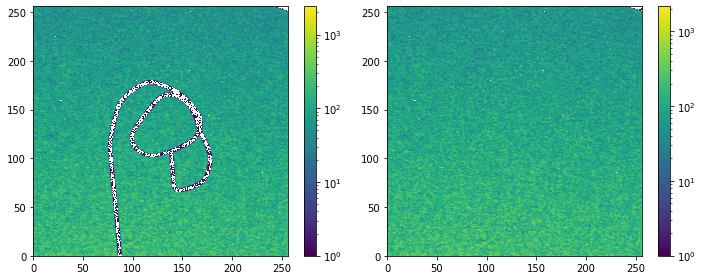

In [8]:
fig, (ax0, ax1) = plt.subplots(ncols=2,nrows=1, figsize=(10, 4))

h = ax0.hist2d(xon1, yon1, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(xoff1, yoff1, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [10]:
# Making Image data

#tminon1 = 4.1; tmaxon1 = 10.0; tminoff1 = 14.5; tmaxoff1 = 20.0

x_on1 = []
y_on1 = []
toa_on1 = []
tot_on1 = []

x_off1 = []
y_off1 = []
toa_off1 = []
tot_off1 = []


    
    
for i in range(len(toa)):
    if toa[i] > tminon1 and toa[i] < tmaxon1:
        x_on1.append(x[i])
        y_on1.append(y[i])
        toa_on1.append(toa[i])
        tot_on1.append(tot[i])
        
    if toa[i] > tminoff1 and toa[i] < tmaxoff1:
        x_off1.append(x[i])
        y_off1.append(y[i])
        toa_off1.append(toa[i])
        tot_off1.append(tot[i])

print('on1 length:', len(y_on1), ', off1 length: ', len(y_off1))        
        
img_on1 = np.zeros([256,256])
img_off1 = np.zeros([256,256])


for k in range(len(y_on1)):
    i = x_on1[k]
    j = y_on1[k]
    img_on1[i][j] = img_on1[i][j] + tot_on1[k]    
    
for k in range(len(y_off1)):
    i = x_off1[k]
    j = y_off1[k]
    img_off1[i][j] = img_off1[i][j] + tot_off1[k]    


on1 length: 7120447 , off1 length:  7397207


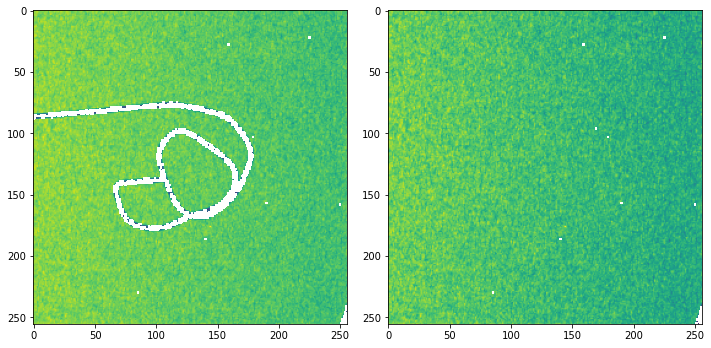

In [11]:


fig, (ax0, ax1) = plt.subplots(ncols=2,nrows=1, figsize=(10, 10))

h=ax0.imshow(img_on1, norm=mpl.colors.LogNorm())
#fig.colorbar(_)

h=ax1.imshow(img_off1, norm=mpl.colors.LogNorm())
#fig.colorbar(_)
#fig.colorbar(_)

fig.tight_layout()
plt.show()




In [19]:
img_size_x = 256
img_size_y = 256





on1_sum = np.sum(img_on1)
off1_sum = np.sum(img_off1)



#img_mean = np.mean(img_sum)
#int_mean = np.mean(img_int) # <X>


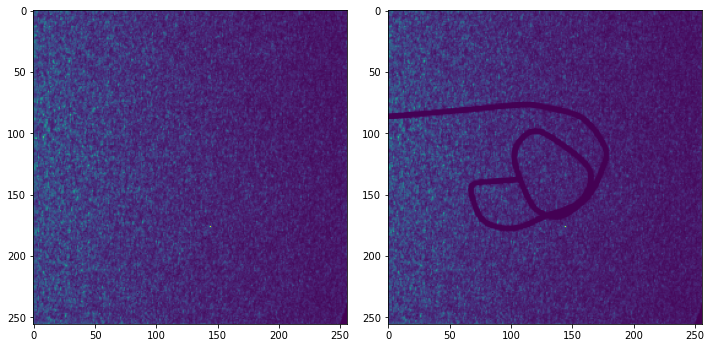

In [20]:
ghost11 = np.zeros([img_size_x,img_size_y])
ghost12 = np.zeros([img_size_x,img_size_y])

for i in range(ghost1.shape[0]):
    for j in range(ghost1.shape[1]):

        ghost11[i,j] = on1_sum*img_off1[i,j]
        ghost12[i,j] = off1_sum*img_on1[i,j]

        
        
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(10, 10))

#h=ax[0].imshow(ghost1, norm=mpl.colors.LogNorm())
h=ax[0].imshow(ghost11)
#fig.colorbar(_)

#h=ax[1].imshow(ghost2, norm=mpl.colors.LogNorm())
h=ax[1].imshow(ghost12)
#fig.colorbar(_)
#fig.colorbar(_)

fig.tight_layout()
plt.show()


